Name: Kien Truong
<br>
CPSC 483-02
<br>
Professor Avery
<br>
Due date: 3/26/2021
<br>
$$ Project#3 description $$
<br>
This project willl be using scikit-learn machine learning library to compare the performace of linear and polynomial regression models. This project will use $ boston.npz $ as dataset to examine how different housing features affect the median price of homes. The objecttive for project 3 is similar to project 2 except the use of scikit-learn library.
<br>
Steps approached:
1. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training (80% of original data) and test sets (20% of the original data).
2. Create a scatterplot of the training data showing the relationship between LSTAT feature and the median of a home.
3. With LSTAT as $ X $ and MEDV as $ y $, create and fit the model, and then generalize an equation for MEDV as a linear function of LSTAT
4. Add the line representing the least squares fit to the scatterplot (in step 2)
5. Use predict() method to find the response for each value of the LSTAT attribute in the training set. Then find the average loss for the training set.
6. Repeat step 5 for the test set.
7. Add a degree-2 polynomial feature to $ X $, then fit a new linear model. Find an compare the training and test MSE values for this model vs. the previous model.
8. Fit the least squares fit to the scatterplot (quadratic).
9. Use 13 input features as $ X $ to fit(), predict(), and find training and test MSE values for this model.
10. Add the squares of all 13 input features to $ X $ and find its training and test MSE values and how they compare to the previous model.
11. Use the fit_transform() method to create degree-2 polynomial and interaction terms for the original set of 13 features, then fit a new linear model. Compare the training, test MSE to the previous model, and effect of adding interaction terms.

In [1]:
import numpy as np
'''
Question 1 - Use load() to load the dataset
'''
data = np.load('boston.npz')
features = data['features']
target = data['target'][:,None]

In [2]:
'''
Question 2 - Split the target and feature values into separate training set (80%) and test set (20%)
'''
from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(features, target, test_size=0.2, random_state=(2021-3-11))
# print(y_test.shape)

The relationship does not seem to be linear.


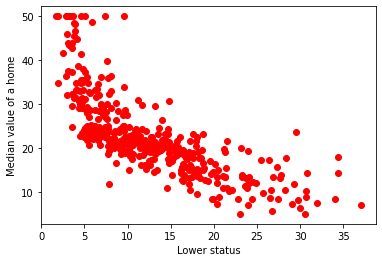

In [3]:
'''
Question 3 - Creates a scatterplot of the training data showing the relationship between the percentage of the
population that is lower status and the median value of a home
'''
import pylab as plt
%matplotlib inline
x_status = x_training[:, 12][:,None]
plt.plot(x_status, y_training, 'ro')
plt.xlabel("Lower status")
plt.ylabel("Median value of a home")
print("The relationship does not seem to be linear.")

In [4]:
'''
Question 4 - With LSTAT as X and MEDV as y, create and fit() the model
'''
from sklearn.linear_model import LinearRegression
X = np.hstack((np.ones_like(x_status), x_status))
y = y_training
# linear_regression = LinearRegression().fit(x_status, y_training)
linear_regression = LinearRegression().fit(X, y)
coef = linear_regression.coef_
intercept = linear_regression.intercept_
# print(coef, intercept)
# print(coef.shape)
print(f"The equation for MEDV as a linear function of LSTAT: MEDV = {intercept[0]} {coef[0][1]}(LSTAT)")

The equation for MEDV as a linear function of LSTAT: MEDV = 34.99113302196946 -0.9809388811855762(LSTAT)


The model does not fit the data well


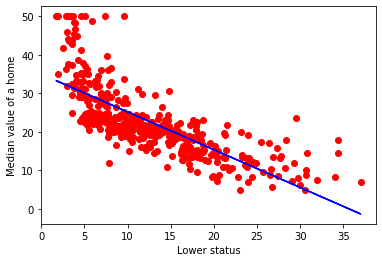

In [5]:
'''
Question 5 - Finds the least squares fit 
'''
import pylab as plt
%matplotlib inline
x_status = x_training[:, 12][:,None]
plt.plot(x_status, y_training, 'ro')
plt.xlabel("Lower status")
plt.ylabel("Median value of a home")
#Finds the least square line
# xtest = np.linspace(0,38,404)
ttest = float(intercept[0]) + float(coef[0][1])*x_status
# ttest = float(intercept[0]) + float(coef[0][1])*xtest
plt.plot(x_status, ttest, 'b')
print("The model does not fit the data well")

In [6]:
'''
Question 6 - Use predict() to find the response for each value of LSTAT
           - Find the avaergae loss for the training
'''
from sklearn.metrics import mean_squared_error
y_prediction = linear_regression.predict(X)
MSE = mean_squared_error(y_training, y_prediction)
print(f"The average loss for the training set is {MSE}")

The average loss for the training set is 38.47893344802524


In [7]:
'''
Question 7 - Repeat step 6 for the test set
'''
X_test = np.hstack((np.ones_like(x_test[:,12][:,None]), x_test[:,12][:,None]))
y_test_prediction = linear_regression.predict(X_test)
MSE = mean_squared_error(y_test, y_test_prediction)
print(f"The average loss for the test set is {MSE}")
print("The test MSE is slightly higer than the test MSE")

The average loss for the test set is 38.75054664279497
The test MSE is slightly higer than the test MSE


In [8]:
'''
Question 8 - Add a degree-2 polynomial feature to X, then fit a new linear model
'''
X = np.hstack((X, x_status**2))
regression = LinearRegression().fit(X, y_training)
# print(X)
# print(coef, intercept)
'''
---- Find training MSE ----
'''
y_training_prediction = regression.predict(X)
# print(y_training_prediction.shape)
MSE_training = mean_squared_error(y_training, y_training_prediction)
print(f"Training MSE = {MSE_training}")
'''
---- Find test MSE ----
'''
X_test = np.hstack((X_test, x_test[:,12][:,None]**2))
# print(X_test)
y_test_prediction = regression.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_prediction)
print(f"Test MSE = {MSE_test}")
print("Both the test and training MSE for this model are smaller than the previous model")

Training MSE = 30.598514349370966
Test MSE = 29.297124138279113
Both the test and training MSE for this model are smaller than the previous model


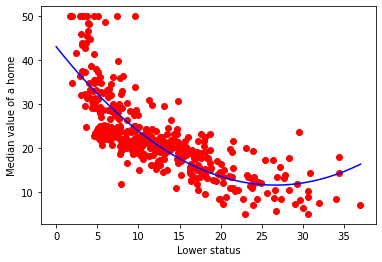

In [9]:
'''
Question 9 - Repeat step 5 for the polynomial model
'''
import pylab as plt
%matplotlib inline
x_status = x_training[:, 12][:,None]
plt.plot(x_status, y_training, 'ro')
plt.xlabel("Lower status")
plt.ylabel("Median value of a home")
# Generating points for graphing
xtest = np.linspace(0, 37, 404)[:,None]
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.hstack((Xtest, xtest**2))
ttest = regression.predict(Xtest)
plt.plot(xtest, ttest, 'b')

In [10]:
'''
Question 10 - Repeat steps 4, 6, and 7 using 13 input features as X.
              How do the training and test MSEs for this model compare to the values found for step 8
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ones_col = np.ones(404)[:,None]
X = np.hstack((ones_col, x_training))
reg = LinearRegression().fit(X, y_training)
'''
----- Training MSE -----
'''
y_training_pred = reg.predict(X)
training_MSE = mean_squared_error(y_training, y_training_pred)
print(f"The training MSE for this model is {training_MSE}")
'''
----- Test MSE ----- 
'''
X_test = np.hstack((np.ones(102)[:,None], x_test))
y_test_pred = reg.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"The test MSE for this model is {test_MSE}\n")

The training MSE for this model is 21.04634080534237
The test MSE for this model is 25.97640893599639



Both the training and test MSE are lower than the training and test MSE of the degree-2 polynomial model found in for experiment (8). The reason for this difference would be the use of all 13 features to predict the median home values for this model comparing using only 1 feature in predicting the median home values.

In [11]:
'''
Question 11 - Combine experiments (8) and (10) to add the squares of 13 input features to X
              How do this model's training and test MSEs compare to the previous model in experiment (11)
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
ones_col = np.ones(404)[:,None]
X = np.hstack((ones_col, x_training, x_training**2))
# print(X.shape)
poly_reg = LinearRegression().fit(X, y_training)
'''
----- Training MSE -----
'''
y_training_pred = poly_reg.predict(X)
training_MSE = mean_squared_error(y_training, y_training_pred)
print(f"The training MSE for this model is {training_MSE}")
'''
----- Test MSE ----- 
'''
X_test = np.hstack((np.ones(102)[:,None], x_test, x_test**2))
y_test_pred = poly_reg.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"The test MSE for this model is {test_MSE}\n")

The training MSE for this model is 13.508100802461701
The test MSE for this model is 17.85789609302842



Both the training and test MSE for this model is lower than the training and test MSE of the previous model. The previous model is underfit since it has higher training MSE comparing to this model.

In [12]:
'''
Question 12 - Use the fit_transform() method to create degree-2 polynomial and interaction terms for the original 
              set of 13 features, then fit a new linear model. Compare the training and test MSE to the previous model. 
              What is the effect of adding interaction terms in this case? Do we seem to be overfitting?
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# X = np.hstack((np.ones(404)[:,None], x_training))
X = x_training
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
# print(X.shape) #(404 rows, 105 columns)
poly_reg = LinearRegression().fit(X, y_training)
'''
----- Training MSE -----
'''
y_training_pred = poly_reg.predict(X)
training_MSE = mean_squared_error(y_training, y_training_pred)
print(f"The training MSE for this model is {training_MSE}")
'''
----- Test MSE -----
'''
# X_test = np.hstack((np.ones(102)[:,None], x_test))
X_test = x_test
X_test = poly.fit_transform(X_test)
# print(X_test.shape)
y_test_pred = poly_reg.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print(f"The test MSE for this model is {test_MSE}\n")

The training MSE for this model is 10.830195867239764
The test MSE for this model is 20.467478672733534



The training MSE for this model is smaller than the previous model, but the test MSE is higher for this model. The effect of adding interaction terms increase the parameters from 14 to 105. It seems to overfit the data because both models have low training MSE, but the test MSE for this model is higher than the previous one.